What are the most demanded skills for the top 3 most popular data roles?
Methodology
1. clean-up skill column
2. calculate skill count based on job_title_short
3. calculate skill percentage
4. plot final findings 

In [31]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [32]:
df_ind = df[df['job_country']=='India']

In [33]:
df_ind_exploded = df_ind.explode('job_skills')
df_ind_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}"
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [34]:
df_ind_skills_count = df_ind_exploded.groupby(['job_skills', 'job_title_short']).size()
df_ind_skills_count = df_ind_skills_count.reset_index(name='skill_count')
df_ind_skills_count.sort_values(by ='skill_count', ascending=False, inplace=True)
df_ind_skills_count


,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [35]:
job_titles = df_ind_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

In [38]:
df_plot = df_ind_skills_count[df_ind_skills_count['job_title_short']== job_title].head(5)
df_plot

,job_skills,job_title_short,skill_count
1373,sql,Data Analyst,3159
1087,python,Data Analyst,2203
392,excel,Data Analyst,2117
1457,tableau,Data Analyst,1667
1033,power bi,Data Analyst,1286


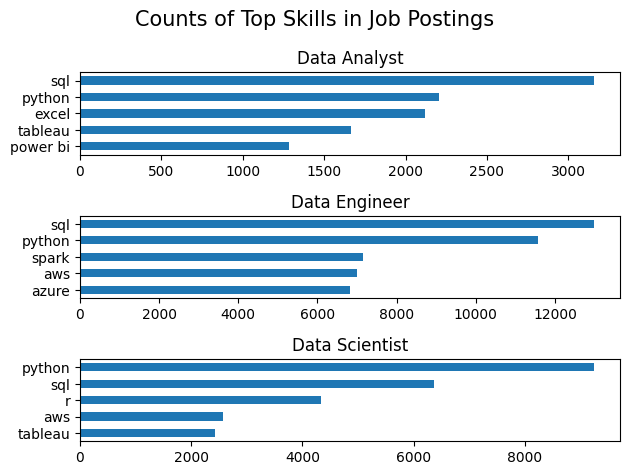

In [47]:
fig, ax= plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles): #to iterate thro 3 roles
    df_plot = df_ind_skills_count[df_ind_skills_count['job_title_short']== job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count',ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)



fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
    

  

we need percentages 

In [52]:
df_ind_jobs_count = df_ind['job_title_short'].value_counts().reset_index(name='jobs_total')
df_ind_jobs_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [58]:
df_ind_merged = pd.merge(df_ind_skills_count, df_ind_jobs_count, how='left', on='job_title_short')
df_ind_merged['skills_perc'] = df_ind_merged['skill_count']/df_ind_merged['jobs_total'] * 100
df_ind_merged

,job_skills,job_title_short,skill_count,jobs_total,skills_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


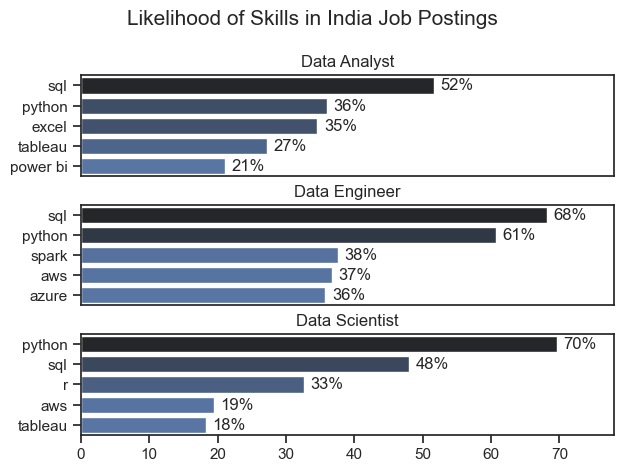

In [66]:
fig, ax= plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i,job_title in enumerate(job_titles): #to iterate thro 3 roles
    df_plot = df_ind_merged[df_ind_merged['job_title_short']== job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_perc', ax=ax[i], title=job_title)

    sns.barplot(data=df_plot, x='skills_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')

    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    
    for n,v in enumerate(df_plot['skills_perc']): #to add perc next to bars
        ax[i].text(v+1 ,n, f'{v:.0f}%', va='center') #plt.text method (x,y, value) v(+1) to move alot 

        #ax[i].set_xticks([]) #to remove all the axes
    if i != len(job_titles) - 1: #last plot = len(job_titles) - 1
        ax[i].set_xticks([])



fig.suptitle('Likelihood of Skills in India Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)